In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def custom_rule(grid, x, y):
    """Custom rule for state transition."""
    neighbors = grid[x-1:x+2, y-1:y+2].sum() - grid[x, y]
    if grid[x, y] == 1:  # Alive
        return 1 if neighbors in [2, 3] else 0
    else:  # Dead
        return 1 if neighbors == 3 else 0

def apply_custom_rule(grid, steps):
    """Applies the custom rule over multiple steps."""
    rows, cols = grid.shape
    grids = [grid]  # Store initial grid
    for _ in range(steps):
        new_grid = grid.copy()
        for x in range(1, rows-1):
            for y in range(1, cols-1):
                new_grid[x, y] = custom_rule(grid, x, y)
        grid = new_grid
        grids.append(grid)  # Store grid at each step
    return grids

# Initial grid
grid = np.zeros((20, 20), dtype=int)
grid[9, 9] = grid[9, 10] = grid[9, 11] = grid[10, 10] = 1  # Glider-like structure

# Number of steps for the simulation
num_steps = 10

# Get the grid states for each step
grids = apply_custom_rule(grid, num_steps)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Function to update the plot for each frame
def animate(i):
    ax.clear()
    ax.imshow(grids[i], cmap='binary', interpolation='none')  # Display the grid
    ax.set_title(f'Time Step {i+1}')
    ax.set_xlabel('Position on Grid')
    ax.set_yticks([])  # Remove y-ticks for cleaner visualization

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=num_steps, interval=500)  # 500ms interval between frames

# Display the animation inline in the notebook
plt.close()  # Close the plot to avoid duplicate display
HTML(anim.to_jshtml())


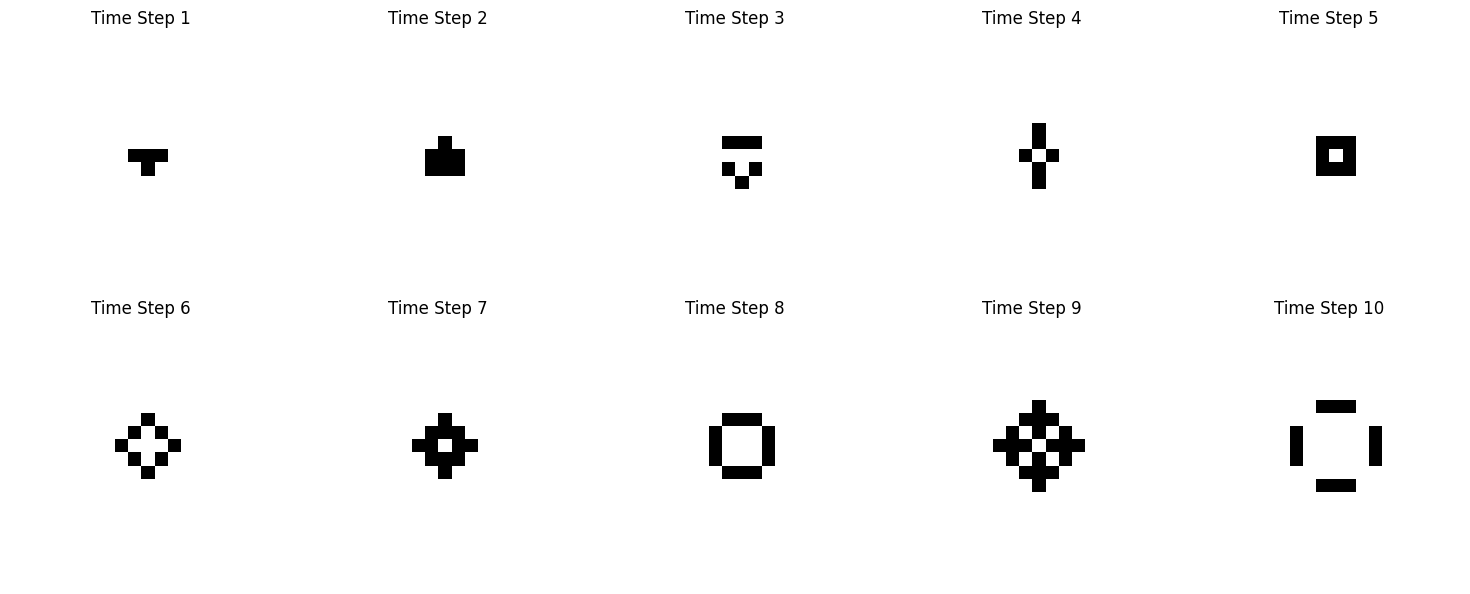

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def custom_rule(grid, x, y):
    """Custom rule for state transition."""
    neighbors = grid[x-1:x+2, y-1:y+2].sum() - grid[x, y]
    if grid[x, y] == 1:  # Alive
        return 1 if neighbors in [2, 3] else 0
    else:  # Dead
        return 1 if neighbors == 3 else 0

def apply_custom_rule(grid, steps):
    """Applies the custom rule over multiple steps."""
    rows, cols = grid.shape
    grids = [grid]  # Store initial grid
    for _ in range(steps):
        new_grid = grid.copy()
        for x in range(1, rows-1):
            for y in range(1, cols-1):
                new_grid[x, y] = custom_rule(grid, x, y)
        grid = new_grid
        grids.append(grid)  # Store grid at each step
    return grids

# Initial grid
grid = np.zeros((20, 20), dtype=int)
grid[9, 9] = grid[9, 10] = grid[9, 11] = grid[10, 10] = 1  # Glider-like structure

# Number of steps for the simulation
num_steps = 10

# Get the grid states for each step
grids = apply_custom_rule(grid, num_steps)

# Set up the subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # Adjust layout based on number of steps
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Display each grid in a subplot
for i in range(num_steps):
    axs[i].imshow(grids[i], cmap='binary', interpolation='none')
    axs[i].set_title(f'Time Step {i+1}')
    axs[i].axis('off')  # Hide axis for clarity

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
